# Intro

In [ ]:
# This is just me following a tutorial from Sentdex
# https://www.youtube.com/watch?v=FLZvOKSCkxY&list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL&t=0s

# I wanted to familiarise myself with NLTK so it will probably be pretty messy and useless.
# Keeping it around so I can refer back to it if I need it

# Setup

In [63]:
import nltk

In [64]:
# This will need to be run to setup the package
# Download all parts (will be around 3.5GB, hence not in this github repo)
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Tokenizing and stopwords

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords 

In [16]:
example_sentence = """
    hello computer, how are you today? 
    I would like to discuss apples and oranges.
    Perhaps we can then move on to talking about stocks.
    I like the stock.
   $GME to the moon!
"""

In [17]:
# Stopwords are just useless information to the model, things like "a, and, the"
# This is the process for stripping these words out of your sample data

stop_words = set(stopwords.words("english"))

In [18]:
words = word_tokenize(example_sentence)

In [19]:
filtered_sentence = [word for word in words if not word in stop_words]
filtered_sentence

['hello',
 'computer',
 ',',
 'today',
 '?',
 'I',
 'would',
 'like',
 'discuss',
 'apples',
 'oranges',
 '.',
 'Perhaps',
 'move',
 'talking',
 'stocks',
 '.',
 'I',
 'like',
 'stock',
 '.',
 '$',
 'GME',
 'moon',
 '!']

# Stemming

In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [21]:
# Reduces words to their root
# Things like WordNet actually solve this so that we won't need to do this
# But it is always good to know where this stuff is coming from

ps = PorterStemmer()
example_words = ["python", "pythoner", "pythoning", "pythoned", "pythonly"]

In [22]:
for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


In [23]:
new_text = "It is very important to be pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once"

In [24]:
words = word_tokenize(new_text)
for w in words:
    print(ps.stem(w))

it
is
veri
import
to
be
pythonli
while
you
are
python
with
python
.
all
python
have
python
poorli
at
least
onc


# Part of speech tagging

In [26]:
import nltk

from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [30]:
# POS tag list:

# CC	coordinating conjunction
# CD	cardinal digit
# DT	determiner
# EX	existential there (like: "there is" ... think of it like "there exists")
# FW	foreign word
# IN	preposition/subordinating conjunction
# JJ	adjective	'big'
# JJR	adjective, comparative	'bigger'
# JJS	adjective, superlative	'biggest'
# LS	list marker	1)
# MD	modal	could, will
# NN	noun, singular 'desk'
# NNS	noun plural	'desks'
# NNP	proper noun, singular	'Harrison'
# NNPS	proper noun, plural	'Americans'
# PDT	predeterminer	'all the kids'
# POS	possessive ending	parent\'s
# PRP	personal pronoun	I, he, she
# PRP$	possessive pronoun	my, his, hers
# RB	adverb	very, silently,
# RBR	adverb, comparative	better
# RBS	adverb, superlative	best
# RP	particle	give up
# TO	to	go 'to' the store.
# UH	interjection	errrrrrrrm
# VB	verb, base form	take
# VBD	verb, past tense	took
# VBG	verb, gerund/present participle	taking
# VBN	verb, past participle	taken
# VBP	verb, sing. present, non-3d	take
# VBZ	verb, 3rd person sing. present	takes
# WDT	wh-determiner	which
# WP	wh-pronoun	who, what
# WP$	possessive wh-pronoun	whose
# WRB	wh-abverb	where, when

In [27]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [28]:
def process_content():
    try:
        for i in tokenized[:10]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            print(tagged)
            
    except Exception as e:
        print(e)

In [29]:
process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

# Chunking

In [ ]:
# Chunking in Natural Language Processing (NLP) is the process by which we group 
# various words together by their part of speech tags. 

In [37]:
def process_content():
    try:
        for i in tokenized[:10]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            chunked.draw()
    
    except Exception as e:
        print(e)

In [38]:
process_content()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


KeyboardInterrupt: 

# Chinking

In [ ]:
# Chinking is a part of the chunking process with natural language processing with NLTK. 
# A chink is what we wish to remove from the chunk. 
# We define a chink in a very similar fashion compared to how we defined the chunk. 

In [41]:
def process_content():
    try:
        for i in tokenized[:10]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            chunkGram = r"""Chunk: {<.*>+}
                                                        }<VB.?|IN|DT>+{"""
            
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            chunked.draw()
    
    except Exception as e:
        print(e)

In [40]:
process_content()

None
None
None
None
None
None
None
None
None
None


# Named Entity Recognition

In [ ]:
# Named entity recognition is useful to quickly find out what the subjects of discussion are. 
# NLTK comes packed full of options for us. 
# We can find just about any named entity, or we can look for specific ones.

In [ ]:
# NE Type and Examples

# ORGANIZATION - Georgia-Pacific Corp., WHO
# PERSON - Eddy Bonte, President Obama
# LOCATION - Murray River, Mount Everest
# DATE - June, 2008-06-29
# TIME - two fifty a m, 1:30 p.m.
# MONEY - 175 million Canadian Dollars, GBP 10.40
# PERCENT - twenty pct, 18.75 %
# FACILITY - Washington Monument, Stonehenge
# GPE - South East Asia, Midlothian

In [45]:
def process_content():
    try:
        for i in tokenized[:10]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            
            namedEnt = nltk.ne_chunk(tagged, binary=True)
            
            namedEnt.draw()
    
    except Exception as e:
        print(e)

In [46]:
process_content()

# Lemmatizing

In [ ]:
# A very similar operation to stemming is called lemmatizing. 
# The major difference between these is, as you saw earlier, 
# stemming can often create non-existent words.

In [47]:
from nltk.stem import WordNetLemmatizer

In [48]:
lemmatizer = WordNetLemmatizer()

In [55]:
# Get root
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))

cat
cactus
goose


In [56]:
# Adjectives - pos = part of speech
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))

good
best


In [62]:
# Verbs
print(lemmatizer.lemmatize("running", pos="v"))
print(lemmatizer.lemmatize("batting", pos="v"))

run
bat


# NLTK Corpora

In [ ]:
# Bodies of texts. 
# Generally, corpora are grouped by some sort of defining

In [66]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize

In [69]:
sample = gutenberg.raw("bible-kjv.txt")
tokenized = sent_tokenize(sample)

In [78]:
for sentence in tokenized[0:15]:
    print(sentence)

[The King James Bible]

The Old Testament of the King James Bible

The First Book of Moses:  Called Genesis


1:1 In the beginning God created the heaven and the earth.
1:2 And the earth was without form, and void; and darkness was upon
the face of the deep.
And the Spirit of God moved upon the face of the
waters.
1:3 And God said, Let there be light: and there was light.
1:4 And God saw the light, that it was good: and God divided the light
from the darkness.
1:5 And God called the light Day, and the darkness he called Night.
And the evening and the morning were the first day.
1:6 And God said, Let there be a firmament in the midst of the waters,
and let it divide the waters from the waters.
1:7 And God made the firmament, and divided the waters which were
under the firmament from the waters which were above the firmament:
and it was so.
1:8 And God called the firmament Heaven.
And the evening and the
morning were the second day.
1:9 And God said, Let the waters under the heaven be ga

# WordNet

In [ ]:
# Part of the NLTK Corpora is WordNet. 
# I wouldn't totally classify WordNet as a Corpora, 
# if anything it is really a giant Lexicon, but, either way, it is super useful. 
# With WordNet we can do things like look up words and their meaning 
# according to their parts of speech, we can find synonyms, antonyms, 
# and even examples of the word in use. 

In [79]:
from nltk.corpus import wordnet

In [81]:
syns = wordnet.synsets("program")
for syn in syns:
    print(syn)

Synset('plan.n.01')
Synset('program.n.02')
Synset('broadcast.n.02')
Synset('platform.n.02')
Synset('program.n.05')
Synset('course_of_study.n.01')
Synset('program.n.07')
Synset('program.n.08')
Synset('program.v.01')
Synset('program.v.02')


In [82]:
# Specific synset
syns[0]

Synset('plan.n.01')

In [84]:
# All lemmas of that synset
syns[0].lemmas()

[Lemma('plan.n.01.plan'),
 Lemma('plan.n.01.program'),
 Lemma('plan.n.01.programme')]

In [85]:
# Just the word of the synset
syns[0].lemmas()[0].name()

'plan'

In [86]:
# Definition
syns[0].definition()

'a series of steps to be carried out or goals to be accomplished'

In [87]:
# Examples
syns[0].examples()

['they drew up a six-step plan', 'they discussed plans for a new bond issue']

In [94]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print("Synonyms:")
for word in set(synonyms):
    print(word)
    
print()
print("Antonyms:")
for word in set(antonyms):
    print(word)

Synonyms:
just
goodness
honest
honorable
practiced
adept
undecomposed
near
thoroughly
sound
estimable
dependable
well
good
beneficial
expert
in_force
salutary
right
skillful
safe
in_effect
skilful
ripe
serious
respectable
unspoilt
proficient
commodity
upright
trade_good
effective
secure
soundly
dear
unspoiled
full

Antonyms:
ill
bad
evil
evilness
badness


In [95]:
w1 = wordnet.synset("ship.n.01")
w2 = wordnet.synset("boat.n.01")

# wup = wu and palmer (semantic similarity)
print(w1.wup_similarity(w2))

0.9090909090909091


In [96]:
w1 = wordnet.synset("ship.n.01")
w2 = wordnet.synset("car.n.01")

print(w1.wup_similarity(w2))

0.6956521739130435


In [97]:
w1 = wordnet.synset("ship.n.01")
w2 = wordnet.synset("cat.n.01")

print(w1.wup_similarity(w2))

0.32


# Text classification

In [99]:
# Now that we understand some of the basics of of natural language processing 
# with the Python NLTK module, we're ready to try out text classification. 
# This is where we attempt to identify a body of text with some sort of label. 

In [100]:
import nltk
import random

from nltk.corpus import movie_reviews

In [102]:
documents = [
    (list(movie_reviews.words(fileId)), category) 
    for category in movie_reviews.categories() 
    for fileId in movie_reviews.fileids(category)
]

random.shuffle(documents)

In [105]:
all_words = []
for word in movie_reviews.words():
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

In [113]:
all_words.most_common(20)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595),
 (')', 11781),
 ('(', 11664),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961)]

In [107]:
all_words["stupid"]

253

# Words as features for learning

In [ ]:
# For our text classification, we have to find some way to "describe" bits of data, 
# which are labeled as either positive or negative for machine learning training purposes. 

In [ ]:
import nltk
import random

from nltk.corpus import movie_reviews

documents = [
    (list(movie_reviews.words(fileId)), category) 
    for category in movie_reviews.categories() 
    for fileId in movie_reviews.fileids(category)
]

random.shuffle(documents)

all_words = []
for word in movie_reviews.words():
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

In [ ]:
def find_features(document):
    words = set(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

In [11]:
find_features(movie_reviews.words("neg/cv000_29416.txt"))

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

In [12]:
feature_sets = [(find_features(rev), category) for (rev, category) in documents]

# Naive Bayes

In [ ]:
# The algorithm of choice, at least at a basic level, for text analysis is often the Naive Bayes classifier. 
# Part of the reason for this is that text data is almost always massive in size. 
# The Naive Bayes algorithm is so simple that it can be used at scale very easily with minimal process requirements.

In [ ]:
import nltk
import random

from nltk.corpus import movie_reviews

documents = [
    (list(movie_reviews.words(fileId)), category) 
    for category in movie_reviews.categories() 
    for fileId in movie_reviews.fileids(category)
]

random.shuffle(documents)

all_words = []
for word in movie_reviews.words():
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

In [27]:
feature_sets = [(find_features(rev), category) for (rev, category) in documents]

training_set = feature_sets[:1900]
testing_set = feature_sets[1900:]

# We are going to use a Naive Bayes approach
# posterior = prior occurences * likelihood / evidence

classifier = nltk.NaiveBayesClassifier.train(training_set)

In [28]:
print(f"Naive Bayes Algo accuracy: {nltk.classify.accuracy(classifier, testing_set) * 100.0:.2f} %")

Naive Bayes Algo accuracy: 78.00 %


In [29]:
classifier.show_most_informative_features(15)

Most Informative Features
                   sucks = True              neg : pos    =     17.2 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                 idiotic = True              neg : pos    =      9.4 : 1.0
                 frances = True              pos : neg    =      8.9 : 1.0
             silverstone = True              neg : pos    =      7.7 : 1.0
              schumacher = True              neg : pos    =      7.1 : 1.0
                  shoddy = True              neg : pos    =      7.1 : 1.0
           unimaginative = True              neg : pos    =      7.1 : 1.0
                  turkey = True              neg : pos    =      6.8 : 1.0
                  regard = True              pos : neg    =      6.5 : 1.0
                 kidding = True              neg : pos    =      6.4 : 1.0
                 cunning = True              pos : neg    =      6.3 : 1.0
                obstacle = True              pos : neg    =      6.3 : 1.0

# Save Classifier with Pickle

In [31]:
import nltk
import random

from nltk.corpus import movie_reviews

documents = [
    (list(movie_reviews.words(fileId)), category) 
    for category in movie_reviews.categories() 
    for fileId in movie_reviews.fileids(category)
]

random.shuffle(documents)

all_words = []
for word in movie_reviews.words():
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

feature_sets = [(find_features(rev), category) for (rev, category) in documents]

training_set = feature_sets[:1900]
testing_set = feature_sets[1900:]

# We are going to use a Naive Bayes approach
# posterior = prior occurences * likelihood / evidence

classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
import pickle

In [33]:
save_classifier = open("naive_bayes.pickle", "wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [35]:
classifier_f = open("naive_bayes.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

In [36]:
print(f"Naive Bayes Algo accuracy: {nltk.classify.accuracy(classifier, testing_set) * 100.0:.2f} %")

Naive Bayes Algo accuracy: 84.00 %


# Scikit-Learn incorporation

In [ ]:
# Despite coming packed with some classifiers, 
# NLTK is mainly a toolkit focused on natural language processing, 
# and not machine learning specifically.

In [9]:
import nltk
import random

from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [48]:
documents = [
    (list(movie_reviews.words(fileId)), category) 
    for category in movie_reviews.categories() 
    for fileId in movie_reviews.fileids(category)
]

random.shuffle(documents)

all_words = []
for word in movie_reviews.words():
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

feature_sets = [(find_features(rev), category) for (rev, category) in documents]

training_set = feature_sets[:1900]
testing_set = feature_sets[1900:]

In [49]:
original_classifier = nltk.NaiveBayesClassifier.train(training_set)
print(f"Original Naive Bayes Algo accuracy: {nltk.classify.accuracy(original_classifier, testing_set) * 100.0:.2f} %")

Original Naive Bayes Algo accuracy: 81.00 %


In [50]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print(f"MNB_classifier accuracy: {nltk.classify.accuracy(MNB_classifier, testing_set) * 100.0:.2f} %")

MNB_classifier accuracy: 80.00 %


In [51]:
bernoulli_classifier = SklearnClassifier(BernoulliNB())
bernoulli_classifier.train(training_set)
print(f"bernoulli_classifier accuracy: {nltk.classify.accuracy(bernoulli_classifier, testing_set) * 100.0:.2f} %")

bernoulli_classifier accuracy: 81.00 %


In [52]:
# gaussian_classifier = SklearnClassifier(GaussianNB())
# gaussian_classifier.train(training_set)
# print(f"GaussianNB Naive Bayes Algo accuracy: {nltk.classify.accuracy(gaussian_classifier, testing_set) * 100.0:.2f} %")

In [53]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print(f"LogisticRegression_classifier accuracy: {nltk.classify.accuracy(LogisticRegression_classifier, testing_set) * 100.0:.2f} %")

/home/tomm/.cache/pypoetry/virtualenvs/nlp-exploration-V-XCybpD-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_classifier accuracy: 85.00 %


In [54]:
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print(f"SGDClassifier_classifier accuracy: {nltk.classify.accuracy(SGDClassifier_classifier, testing_set) * 100.0:.2f} %")

SGDClassifier_classifier accuracy: 83.00 %


In [55]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print(f"SVC_classifier accuracy: {nltk.classify.accuracy(SVC_classifier, testing_set) * 100.0:.2f} %")

SVC_classifier accuracy: 88.00 %


In [56]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print(f"LinearSVC_classifier accuracy: {nltk.classify.accuracy(LinearSVC_classifier, testing_set) * 100.0:.2f} %")

LinearSVC_classifier accuracy: 83.00 %


In [57]:
NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print(f"NuSVC_classifier accuracy: {nltk.classify.accuracy(NuSVC_classifier, testing_set) * 100.0:.2f} %")

NuSVC_classifier accuracy: 86.00 %


# Combining Algos with a Vote

In [77]:
import nltk
import random

from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

documents = [
    (list(movie_reviews.words(fileId)), category) 
    for category in movie_reviews.categories() 
    for fileId in movie_reviews.fileids(category)
]

random.shuffle(documents)

all_words = []
for word in movie_reviews.words():
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

feature_sets = [(find_features(rev), category) for (rev, category) in documents]

training_set = feature_sets[:1900]
testing_set = feature_sets[1900:]

/home/tomm/.cache/pypoetry/virtualenvs/nlp-exploration-V-XCybpD-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<SklearnClassifier(NuSVC())>

In [79]:
from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        
        return conf
        

In [78]:
original_classifier = nltk.NaiveBayesClassifier.train(training_set)
print(f"Original Naive Bayes Algo accuracy: {nltk.classify.accuracy(original_classifier, testing_set) * 100.0:.2f} %")

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print(f"MNB_classifier accuracy: {nltk.classify.accuracy(MNB_classifier, testing_set) * 100.0:.2f} %")

bernoulli_classifier = SklearnClassifier(BernoulliNB())
bernoulli_classifier.train(training_set)
print(f"bernoulli_classifier accuracy: {nltk.classify.accuracy(bernoulli_classifier, testing_set) * 100.0:.2f} %")

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print(f"LogisticRegression_classifier accuracy: {nltk.classify.accuracy(LogisticRegression_classifier, testing_set) * 100.0:.2f} %")

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print(f"SGDClassifier_classifier accuracy: {nltk.classify.accuracy(SGDClassifier_classifier, testing_set) * 100.0:.2f} %")

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print(f"LinearSVC_classifier accuracy: {nltk.classify.accuracy(LinearSVC_classifier, testing_set) * 100.0:.2f} %")

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print(f"NuSVC_classifier accuracy: {nltk.classify.accuracy(NuSVC_classifier, testing_set) * 100.0:.2f} %")

In [80]:
voted_classifier = VoteClassifier(
    original_classifier,
    MNB_classifier,
    bernoulli_classifier,
    LogisticRegression_classifier,
    SGDClassifier_classifier,
    LinearSVC_classifier,
    NuSVC_classifier,
)

print(f"voted_classifier accuracy: {nltk.classify.accuracy(voted_classifier, testing_set) * 100.0:.2f} %")

voted_classifier accuracy: 77.00 %


In [81]:
target_review = testing_set[0][0]
print(f"Classification: {voted_classifier.classify(target_review)}")
print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Classification: neg
Confidence: 100.0 %


In [82]:
target_review = testing_set[1][0]
print(f"Classification: {voted_classifier.classify(target_review)}")
print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Classification: neg
Confidence: 100.0 %


In [83]:
target_review = testing_set[2][0]
print(f"Classification: {voted_classifier.classify(target_review)}")
print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Classification: pos
Confidence: 100.0 %


In [84]:
target_review = testing_set[3][0]
print(f"Classification: {voted_classifier.classify(target_review)}")
print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Classification: pos
Confidence: 100.0 %


In [85]:
target_review = testing_set[4][0]
print(f"Classification: {voted_classifier.classify(target_review)}")
print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Classification: pos
Confidence: 85.71428571428571 %


In [86]:
target_review = testing_set[5][0]
print(f"Classification: {voted_classifier.classify(target_review)}")
print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Classification: neg
Confidence: 100.0 %


# Investigating Bias

In [88]:
import nltk
import random

from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

In [89]:
documents = [
    (list(movie_reviews.words(fileId)), category) 
    for category in movie_reviews.categories() 
    for fileId in movie_reviews.fileids(category)
]

all_words = []
for word in movie_reviews.words():
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

feature_sets = [(find_features(rev), category) for (rev, category) in documents]


class VoteClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        
        return conf

In [90]:
# Positive test set
training_set = feature_sets[:1900]
testing_set = feature_sets[1900:]

In [92]:
# Negative test set
training_set = feature_sets[100:]
testing_set = feature_sets[:100]

In [93]:
original_classifier = nltk.NaiveBayesClassifier.train(training_set)
print(f"Original Naive Bayes Algo accuracy: {nltk.classify.accuracy(original_classifier, testing_set) * 100.0:.2f} %")

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print(f"MNB_classifier accuracy: {nltk.classify.accuracy(MNB_classifier, testing_set) * 100.0:.2f} %")

bernoulli_classifier = SklearnClassifier(BernoulliNB())
bernoulli_classifier.train(training_set)
print(f"bernoulli_classifier accuracy: {nltk.classify.accuracy(bernoulli_classifier, testing_set) * 100.0:.2f} %")

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print(f"LogisticRegression_classifier accuracy: {nltk.classify.accuracy(LogisticRegression_classifier, testing_set) * 100.0:.2f} %")

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print(f"SGDClassifier_classifier accuracy: {nltk.classify.accuracy(SGDClassifier_classifier, testing_set) * 100.0:.2f} %")

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print(f"LinearSVC_classifier accuracy: {nltk.classify.accuracy(LinearSVC_classifier, testing_set) * 100.0:.2f} %")

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print(f"NuSVC_classifier accuracy: {nltk.classify.accuracy(NuSVC_classifier, testing_set) * 100.0:.2f} %")

voted_classifier = VoteClassifier(
    original_classifier,
    MNB_classifier,
    bernoulli_classifier,
    LogisticRegression_classifier,
    SGDClassifier_classifier,
    LinearSVC_classifier,
    NuSVC_classifier,
)
print(f"voted_classifier accuracy: {nltk.classify.accuracy(voted_classifier, testing_set) * 100.0:.2f} %")

for i in range(0, 5):
    print()
    print(f"Looking at review {i}")
    target_review = testing_set[i][0]
    print(f"Classification: {voted_classifier.classify(target_review)}")
    print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Original Naive Bayes Algo accuracy: 79.00 %
MNB_classifier accuracy: 80.00 %
bernoulli_classifier accuracy: 80.00 %


/home/tomm/.cache/pypoetry/virtualenvs/nlp-exploration-V-XCybpD-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_classifier accuracy: 73.00 %
SGDClassifier_classifier accuracy: 73.00 %
LinearSVC_classifier accuracy: 72.00 %
NuSVC_classifier accuracy: 77.00 %
voted_classifier accuracy: 81.00 %

Looking at review 0
Classification: pos
Confidence: 71.42857142857143 %

Looking at review 1
Classification: neg
Confidence: 100.0 %

Looking at review 2
Classification: neg
Confidence: 100.0 %

Looking at review 3
Classification: neg
Confidence: 57.14285714285714 %

Looking at review 4
Classification: neg
Confidence: 57.14285714285714 %


# Better training Data

In [1]:
import nltk
import random

from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

In [2]:
class VoteClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        
        return conf

In [6]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

In [7]:
short_positives = open("tutorial_datasets/positive.txt", "r").read()
short_negatives = open("tutorial_datasets/negative.txt", "r").read()

documents = []

for review in short_positives.split("\n"):
    documents.append( (review, "pos") )

for review in short_negatives.split("\n"):
    documents.append( (review, "neg") )

all_words = []

short_pos_words = nltk.word_tokenize(short_positives)
short_neg_words = nltk.word_tokenize(short_negatives)

for word in short_pos_words:
    all_words.append(word.lower())

for word in short_neg_words:
    all_words.append(word.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

feature_sets = [(find_features(rev), category) for (rev, category) in documents]
random.shuffle(feature_sets)

In [8]:
training_set = feature_sets[:10_000]
testing_set = feature_sets[10_000:]

In [9]:
original_classifier = nltk.NaiveBayesClassifier.train(training_set)
print(f"Original Naive Bayes Algo accuracy: {nltk.classify.accuracy(original_classifier, testing_set) * 100.0:.2f} %")

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print(f"MNB_classifier accuracy: {nltk.classify.accuracy(MNB_classifier, testing_set) * 100.0:.2f} %")

bernoulli_classifier = SklearnClassifier(BernoulliNB())
bernoulli_classifier.train(training_set)
print(f"bernoulli_classifier accuracy: {nltk.classify.accuracy(bernoulli_classifier, testing_set) * 100.0:.2f} %")

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print(f"LogisticRegression_classifier accuracy: {nltk.classify.accuracy(LogisticRegression_classifier, testing_set) * 100.0:.2f} %")

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print(f"SGDClassifier_classifier accuracy: {nltk.classify.accuracy(SGDClassifier_classifier, testing_set) * 100.0:.2f} %")

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print(f"LinearSVC_classifier accuracy: {nltk.classify.accuracy(LinearSVC_classifier, testing_set) * 100.0:.2f} %")

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print(f"NuSVC_classifier accuracy: {nltk.classify.accuracy(NuSVC_classifier, testing_set) * 100.0:.2f} %")

voted_classifier = VoteClassifier(
    original_classifier,
    MNB_classifier,
    bernoulli_classifier,
    LogisticRegression_classifier,
    SGDClassifier_classifier,
    LinearSVC_classifier,
    NuSVC_classifier,
)
print(f"voted_classifier accuracy: {nltk.classify.accuracy(voted_classifier, testing_set) * 100.0:.2f} %")

for i in range(0, 5):
    print()
    print(f"Looking at review {i}")
    target_review = testing_set[i][0]
    print(f"Classification: {voted_classifier.classify(target_review)}")
    print(f"Confidence: {voted_classifier.confidence(target_review) * 100.0} %")

Original Naive Bayes Algo accuracy: 71.90 %
MNB_classifier accuracy: 72.05 %
bernoulli_classifier accuracy: 72.51 %


/home/tomm/.cache/pypoetry/virtualenvs/nlp-exploration-V-XCybpD-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_classifier accuracy: 71.75 %
SGDClassifier_classifier accuracy: 71.15 %
LinearSVC_classifier accuracy: 69.64 %
NuSVC_classifier accuracy: 74.02 %
voted_classifier accuracy: 74.17 %

Looking at review 0
Classification: neg
Confidence: 85.71428571428571 %

Looking at review 1
Classification: pos
Confidence: 100.0 %

Looking at review 2
Classification: pos
Confidence: 71.42857142857143 %

Looking at review 3
Classification: pos
Confidence: 57.14285714285714 %

Looking at review 4
Classification: neg
Confidence: 100.0 %


In [14]:
# Pickle the classifiers
import pickle

classifiers = {
    "bayes_classifier": original_classifier,
    "mnb_classifier": MNB_classifier,
    "bernoulli_classifier": bernoulli_classifier,
    "logisticRegression_classifier": LogisticRegression_classifier,
    "sgd_classifier": SGDClassifier_classifier,
    "svc_classifier": LinearSVC_classifier,
    "nuSvc_classifier": NuSVC_classifier # This one is HUGE, probably best to leave
}

for classifier in classifiers:
    save_classifier = open(f"tutorial_pickles/{classifier}.pickle", "wb")
    pickle.dump(classifiers[classifier], save_classifier)
    save_classifier.close()

In [15]:
# Pickle the other stuff

save_all_words = open("tutorial_pickles/all_words.pickle", "wb")
pickle.dump(all_words, save_all_words)
save_all_words.close()

# Sentiment Analysis Module

## Generating everything and pickling

In [1]:
import nltk
import random

from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

In [2]:
class VoteClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        
        return conf

In [3]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features

In [14]:
# J is adjective, R is adverb, and V is verb
allowed_word_types = [
    "J",
#     "R",
#     "V"
]

short_positives = open("tutorial_datasets/positive.txt", "r").read()
short_negatives = open("tutorial_datasets/negative.txt", "r").read()

all_words = []
documents = []

for p in short_positives.split("\n"):
    documents.append( (p, "pos") )
    words = word_tokenize(p)
    
    # Get parts of speech
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

for p in short_negatives.split("\n"):
    documents.append( (p, "neg") )
    words = word_tokenize(p)
    
    # Get parts of speech
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
    
save_documents = open("tutorial_pickles/documents.pickle", "wb")
pickle.dump(documents, save_documents)
save_documents.close()

In [ ]:
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:5_000]

save_word_features = open("tutorial_pickles/word_features.pickle", "wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

In [ ]:
feature_sets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(feature_sets)
print(f"Found {len(feature_sets)} feature sets")

save_feature_sets = open("tutorial_pickles/feature_sets.pickle", "wb")
pickle.dump(feature_sets, save_feature_sets)
save_feature_sets.close()

training_set = feature_sets[:10_000]
testing_set = feature_sets[10_000:]

In [ ]:
original_classifier = nltk.NaiveBayesClassifier.train(training_set)
print(f"Original Naive Bayes Algo accuracy: {nltk.classify.accuracy(original_classifier, testing_set) * 100.0:.2f} %")

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print(f"MNB_classifier accuracy: {nltk.classify.accuracy(MNB_classifier, testing_set) * 100.0:.2f} %")

bernoulli_classifier = SklearnClassifier(BernoulliNB())
bernoulli_classifier.train(training_set)
print(f"bernoulli_classifier accuracy: {nltk.classify.accuracy(bernoulli_classifier, testing_set) * 100.0:.2f} %")

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print(f"LogisticRegression_classifier accuracy: {nltk.classify.accuracy(LogisticRegression_classifier, testing_set) * 100.0:.2f} %")

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print(f"SGDClassifier_classifier accuracy: {nltk.classify.accuracy(SGDClassifier_classifier, testing_set) * 100.0:.2f} %")

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print(f"LinearSVC_classifier accuracy: {nltk.classify.accuracy(LinearSVC_classifier, testing_set) * 100.0:.2f} %")

voted_classifier = VoteClassifier(
    original_classifier,
    MNB_classifier,
    bernoulli_classifier,
    LogisticRegression_classifier,
    SGDClassifier_classifier,
    LinearSVC_classifier
)
print(f"voted_classifier accuracy: {nltk.classify.accuracy(voted_classifier, testing_set) * 100.0:.2f} %")

In [ ]:
# Pickle the classifiers
import pickle

classifiers = {
    "bayes_classifier": original_classifier,
    "mnb_classifier": MNB_classifier,
    "bernoulli_classifier": bernoulli_classifier,
    "logisticRegression_classifier": LogisticRegression_classifier,
    "sgd_classifier": SGDClassifier_classifier,
    "svc_classifier": LinearSVC_classifier
}

for classifier in classifiers:
    save_classifier = open(f"tutorial_pickles/{classifier}.pickle", "wb")
    pickle.dump(classifiers[classifier], save_classifier)
    save_classifier.close()

In [ ]:
def sentiment(text):
    feats = find_features(text)
    
    return voted_classifier.classify(feats)

## Treating it as a module

In [ ]:
# You would need to save this as something like "sentiment_mod.py"

In [5]:
import nltk
import random
import pickle

from nltk.tokenize import word_tokenize

from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from statistics import mode

In [6]:
class VoteClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        
        return conf

In [7]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features


def read_pickle(pickle_name):
    opener = open(f"tutorial_pickles/{pickle_name}.pickle", "rb")
    result = pickle.load(opener, encoding="latin-1")
    opener.close()
    return result

In [15]:
original_classifier = read_pickle("bayes_classifier")
MNB_classifier = read_pickle("mnb_classifier")
bernoulli_classifier = read_pickle("bernoulli_classifier")
LogisticRegression_classifier = read_pickle("logisticRegression_classifier")
SGDClassifier_classifier = read_pickle("sgd_classifier")
LinearSVC_classifier = read_pickle("svc_classifier")

documents = read_pickle("documents")
all_words = read_pickle("all_words")
word_features = read_pickle("word_features")

FileNotFoundError: [Errno 2] No such file or directory: 'bayes_classifier.pickle'

In [5]:
# Should probably pickle this but it gets huge so no thank you
feature_sets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(feature_sets)
print(f"Found {len(feature_sets)} feature sets")

training_set = feature_sets[:10_000]
testing_set = feature_sets[10_000:]

Found 10662 feature sets


In [6]:
def sentiment(text):
    feats = find_features(text)
    
    return voted_classifier.classify(feats), voted_classifier.confidence(feats)

In [12]:
voted_classifier = VoteClassifier(
    original_classifier,
    MNB_classifier,
    bernoulli_classifier,
    LogisticRegression_classifier,
    SGDClassifier_classifier,
    LinearSVC_classifier
)

## Bringing it together

In [10]:
# Imagine we actually saved it as sentiment_mod.py
# import sentiment_mod as s

In [32]:
sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons... so yeah!")

('pos', 1.0)

In [33]:
sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10")

('neg', 1.0)

In [34]:
sentiment("TSLA is looking pretty bullish right now")

('neg', 0.5)

# Twitter Sentiment Analysis

In [9]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

In [10]:
import nltk
import random
import pickle

from nltk.tokenize import word_tokenize

from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from statistics import mode

In [11]:
# Again, pretend we have actually imported this
def sentiment(text):
    feats = find_features(text)
    
    return voted_classifier.classify(feats), voted_classifier.confidence(feats)


def find_features(document):
    words = word_tokenize(document)
    features = {}
    
    for word in word_features:
        features[word] = (word in words)
        
    return features


def read_pickle(pickle_name):
    opener = open(f"{pickle_name}.pickle", "rb")
    result = pickle.load(opener, encoding="latin-1")
    opener.close()
    return result

In [12]:
class VoteClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        
        return conf

In [16]:
original_classifier = read_pickle("tutorial_pickles/bayes_classifier")
MNB_classifier = read_pickle("tutorial_pickles/mnb_classifier")
bernoulli_classifier = read_pickle("tutorial_pickles/bernoulli_classifier")
LogisticRegression_classifier = read_pickle("tutorial_pickles/logisticRegression_classifier")
SGDClassifier_classifier = read_pickle("tutorial_pickles/sgd_classifier")
LinearSVC_classifier = read_pickle("tutorial_pickles/svc_classifier")

documents = read_pickle("tutorial_pickles/documents")
all_words = read_pickle("tutorial_pickles/all_words")
word_features = read_pickle("tutorial_pickles/word_features")

feature_sets = [(find_features(rev), category) for (rev, category) in documents]
random.shuffle(feature_sets)
print(f"Found {len(feature_sets)} feature sets")

training_set = feature_sets[:10_000]
testing_set = feature_sets[10_000:]

Found 10662 feature sets


In [17]:
class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)

        tweet = all_data["text"]
        
        sentiment_value, confidence = sentiment(tweet)

        print(tweet)
        print(f"Sentiment: {sentiment_value}")
        print(f"Confidence: {confidence}")
        
        if confidence * 100.0 >= 80.0:
            output = open("tutorial_datasets/twitter-out.txt", "a")
            output.write(sentiment_value)
            output.write("\n")
            output.close()

        return True

    def on_error(self, status):
        print(status)

In [18]:
voted_classifier = VoteClassifier(
    original_classifier,
    MNB_classifier,
    bernoulli_classifier,
    LogisticRegression_classifier,
    SGDClassifier_classifier,
    LinearSVC_classifier
)

In [19]:
import helper

twitter_helper = helper.TwitterHelper()
reddit_helper = helper.RedditHelper()

In [21]:
# Collect these from an external file (not on GitHub)
#consumer key, consumer secret, access token, access secret.
ckey = twitter_helper.api_key
csecret = twitter_helper.secret_key
atoken = twitter_helper.access_token
asecret = twitter_helper.access_secret

        
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["JEEP"])

RT @ailyn11ac: i'm selling my gfs jeep for bad bunny tickets🥳lmk if you're interested... serious inquiries only https://t.co/GqPKwFDvC6
Sentiment: neg
Confidence: 1.0
@nuggets Honestly i still truly believe nba is rigged. Its basketball entertainment. They just feature certain guys… https://t.co/sdBYpHOmiq
Sentiment: neg
Confidence: 0.5
@jeepsforlifee @davidmweissman Lololll also, you insisting the factual statement is that people get by without cars… https://t.co/ozKAlJF1Vb
Sentiment: neg
Confidence: 1.0
https://t.co/VjhyIWaxdH

2021 Jeep Gladiator Pickup's New Texas Trail Model Is Exclusively for Texans
Sentiment: neg
Confidence: 1.0
Don’t ignore your mirrors
Sentiment: neg
Confidence: 1.0
There are some people who make me want to choose violence sometimes .... especially the asshole who threw a drink a… https://t.co/s6UnqaxZeZ
Sentiment: neg
Confidence: 1.0
My little brother gets my Jeep stuck in the creek. It had to stay over night shit sucked. Our friends dad came to r… https://t.

KeyboardInterrupt: 

# Graphing Live Twitter sentiment

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

from matplotlib import style

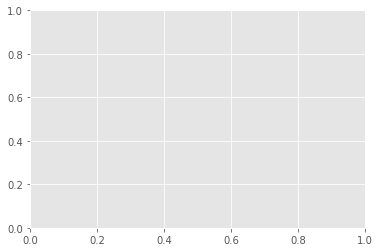

In [23]:
style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("tutorial_datasets/twitter-out.txt", "r").read()
    lines = pullData.split('\n')
    
    xar = []
    yar = []
    
    x = 0
    y = 0
    
    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1
        
        xar.append(x)
        yar.append(y)
    
    ax1.clear()
    ax1.plot(xar,yar)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()